In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv("products.csv")
x = dataset.values[:,2:4]
y = dataset.values[:,4]

# show 10 first x and y
print(x[:10])
print(y[:10])

[[19 19000]
 [35 20000]
 [26 43000]
 [27 57000]
 [19 76000]
 [27 58000]
 [27 84000]
 [32 150000]
 [25 33000]
 [35 65000]]
[0 0 0 0 0 0 0 1 0 0]


In [3]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, random_state=0
)

# print 5 first in x_train, y_train, x_test, y_test
print(x_train[:5])
print(y_train[:5])
print(x_test[:5])
print(y_test[:5])

[[44 39000]
 [32 120000]
 [38 50000]
 [32 135000]
 [52 21000]]
[0 1 0 1 1]
[[30 87000]
 [38 50000]
 [35 75000]
 [30 79000]
 [35 50000]]
[0 0 0 0 0]


In [4]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

# print 5 first in x_train, x_test
print(x_train[:5])
print(x_test[:5])

[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]]
[[-0.80480212  0.50496393]
 [-0.01254409 -0.5677824 ]
 [-0.30964085  0.1570462 ]
 [-0.80480212  0.27301877]
 [-0.30964085 -0.5677824 ]]


In [5]:
import torch as t
x_train = t.tensor(x_train.astype(np.float32))
x_test = t.tensor(x_test.astype(np.float32))
y_train = t.tensor(y_train.astype(np.float32))
y_test = t.tensor(y_test.astype(np.float32))

In [6]:
from prettytable import PrettyTable

def count_parameters(model):
    table = PrettyTable(["Modules", "Parameters"])
    total_params = 0
    for name, parameter in model.named_parameters():
        if not parameter.requires_grad: continue
        param = parameter.numel()
        table.add_row([name, param])
        total_params+=param
    print(table)
    print(f"Total Trainable Params: {total_params}")
    return total_params

In [7]:
import torch as t
import torch.nn as nn
import numpy as np

class ProductsModel(nn.Module):
    def __init__(self):
        super(ProductsModel, self).__init__()
        self.hidden = nn.Linear(2, 32)
        self.hidden2 = nn.Linear(32, 32)
        self.final = nn.Linear(32, 1)

    def forward(self, x):
        if type(x) == np.ndarray:
            x = t.from_numpy(x).float()
        x = self.hidden(x)
        x = t.relu(x)
        x = self.hidden2(x)
        x = t.relu(x)
        x = self.final(x)
        x = t.sigmoid(x)
        return x[:, 0]

model = ProductsModel()

count_parameters(model)

+----------------+------------+
|    Modules     | Parameters |
+----------------+------------+
| hidden.weight  |     64     |
|  hidden.bias   |     32     |
| hidden2.weight |    1024    |
|  hidden2.bias  |     32     |
|  final.weight  |     32     |
|   final.bias   |     1      |
+----------------+------------+
Total Trainable Params: 1185


1185

In [8]:
import torch as t
import torch.nn as nn

loss_fn = nn.MSELoss()
optimizer = t.optim.Adam(model.parameters(), lr=0.1)

for epoch in range(50):
    y_pred = model(x_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    y_discrete = y_pred.round()
    accuracy = (y_discrete == y_train).float().mean()
    print('Epoch: ', epoch, '| train loss: %.4f' % loss.item(), '| train accuracy: %.2f' % (accuracy.item() * 100))

Epoch:  0 | train loss: 0.2512 | train accuracy: 37.00
Epoch:  1 | train loss: 0.1490 | train accuracy: 81.67
Epoch:  2 | train loss: 0.1400 | train accuracy: 79.00
Epoch:  3 | train loss: 0.0910 | train accuracy: 89.33
Epoch:  4 | train loss: 0.1017 | train accuracy: 88.00
Epoch:  5 | train loss: 0.0907 | train accuracy: 89.67
Epoch:  6 | train loss: 0.0856 | train accuracy: 90.67
Epoch:  7 | train loss: 0.0857 | train accuracy: 89.67
Epoch:  8 | train loss: 0.0782 | train accuracy: 91.33
Epoch:  9 | train loss: 0.0752 | train accuracy: 92.33
Epoch:  10 | train loss: 0.0752 | train accuracy: 91.67
Epoch:  11 | train loss: 0.0766 | train accuracy: 91.33
Epoch:  12 | train loss: 0.0746 | train accuracy: 92.00
Epoch:  13 | train loss: 0.0721 | train accuracy: 92.33
Epoch:  14 | train loss: 0.0712 | train accuracy: 92.00
Epoch:  15 | train loss: 0.0715 | train accuracy: 91.67
Epoch:  16 | train loss: 0.0721 | train accuracy: 92.33
Epoch:  17 | train loss: 0.0726 | train accuracy: 92.00
Ep

In [9]:
y_pred = model(x_test)
y_discrete = y_pred.round()
accuracy = (y_discrete == y_test).float().mean()
print('| test loss: %.4f' % loss.item(), '| test accuracy: %.2f' % (accuracy.item() * 100))

| test loss: 0.0682 | test accuracy: 93.00


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


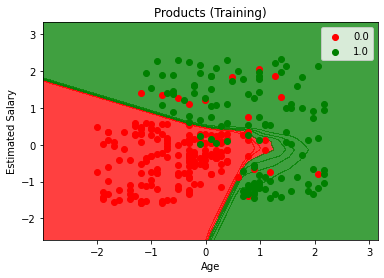

In [10]:
from matplotlib.colors import ListedColormap

y_pred = model(x_test)

x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(
    np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
    np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01),
)
plt.contourf(
    x1,
    x2,
    model(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape).float().detach().numpy(),
    alpha=0.75,
    cmap=ListedColormap(("red", "green")),
)
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        x_set[y_set == j, 0],
        x_set[y_set == j, 1],
        c=ListedColormap(("red", "green"))(i),
        label=j,
    )
plt.title("Products (Training)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.savefig("images/products_train_pytorch.png")
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


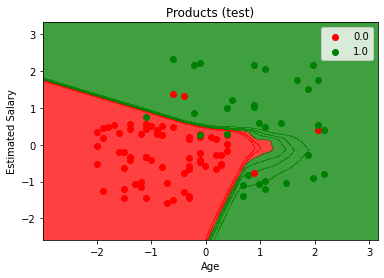

In [11]:
from matplotlib.colors import ListedColormap

x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(
    np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
    np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01),
)
plt.contourf(
    x1,
    x2,
    model(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape).float().detach().numpy(),
    alpha=0.75,
    cmap=ListedColormap(("red", "green")),
)
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        x_set[y_set == j, 0],
        x_set[y_set == j, 1],
        c=ListedColormap(("red", "green"))(i),
        label=j,
    )
plt.title("Products (test)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.savefig("./images/products_test_pytorch.png")
plt.show()